In [1]:
import pandas as pd 

In [2]:
df  = pd.read_csv("healthcare_dataset.csv")

In [3]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
df["Test Results"].unique()

array(['Normal', 'Inconclusive', 'Abnormal'], dtype=object)

In [6]:
mapping = {
    'Normal': 1,
    'Inconclusive': 2,
    'Abnormal': 3
}

df["Test Results"] = df["Test Results"].map(mapping)


In [7]:
df["Test Results"].unique()

array([1, 2, 3])

# Feature Selection turlari 
#1) Filtering 
#2) Wrapper 
#3) Embedded

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

class Datapreprocessing:
    def __init__(self, df):
        self.df = df.copy()
    
    # Handle missing values
    def tozala(self):
        for col in self.df.columns:
            if self.df[col].isnull().any():
                if self.df[col].dtype == 'object':
                    self.df[col].fillna(self.df[col].mode()[0], inplace=True)
                else:
                    self.df[col].fillna(self.df[col].mean(), inplace=True)
        return self
    
    # Encode categorical variables
    def encodla(self):
        encoder = LabelEncoder()
        for col in self.df.columns:
            if self.df[col].dtype == 'object':
                if self.df[col].nunique() <= 5:  # few categories → OneHot
                    dummies = pd.get_dummies(self.df[col], prefix=col, dtype=int)
                    self.df = pd.concat([self.df.drop(columns=[col]), dummies], axis=1)
                else:  # many categories → Label Encoding
                    self.df[col] = encoder.fit_transform(self.df[col])
        return self
    
    # Scale numeric features
    def scale_qil(self):
        scaler = MinMaxScaler()
        num_cols = self.df.select_dtypes(include=['int64', 'float64']).columns.drop('xG', errors='ignore')
        self.df[num_cols] = scaler.fit_transform(self.df[num_cols])
        return self
    
    # Log transformation for skewed features
    def log_transform(self, threshold=0.5):
        skewness = self.df.skew()
        features_log = skewness[(skewness >= threshold)].index.tolist()
        
        for col in features_log:
            if (self.df[col] > 0).all():  # only positive values
                self.df[col] = np.log1p(self.df[col])
        return self

In [10]:
processor = Datapreprocessing(df)

df_ready = (
    processor
    .tozala()
    .encodla()
    .scale_qil()
    .log_transform()
    .df
)

print(df_ready.head())

       Name       Age  Blood Type  Medical Condition  Date of Admission  \
0  0.061371  0.223684    0.714286                0.4           0.946878   
1  0.304275  0.644737    0.000000                1.0           0.056955   
2  0.129543  0.828947    0.142857                1.0           0.675246   
3  0.538797  0.197368    0.857143                0.6           0.306681   
4  0.524914  0.394737    0.285714                0.4           0.673604   

     Doctor  Hospital  Billing Amount  Room Number  Discharge Date  ...  \
0  0.659693  0.750671        0.380933     0.568922        0.932615  ...   
1  0.834110  0.401555        0.650904     0.411028        0.058760  ...   
2  0.937729  0.137254        0.547053     0.260652        0.672237  ...   
3  0.558032  0.308890        0.728798     0.874687        0.317520  ...   
4  0.526996  0.842583        0.296622     0.894737        0.673315  ...   

   Insurance Provider_Medicare  Insurance Provider_UnitedHealthcare  \
0                          

In [11]:
df_ready.head()

,Name,Age,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Billing Amount,Room Number,Discharge Date,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,0.061371,0.223684,0.714286,0.4,0.946878,0.659693,0.750671,0.380933,0.568922,0.932615,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.304275,0.644737,0.000000,1.0,0.056955,0.834110,0.401555,0.650904,0.411028,0.058760,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.129543,0.828947,0.142857,1.0,0.675246,0.937729,0.137254,0.547053,0.260652,0.672237,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.538797,0.197368,0.857143,0.6,0.306681,0.558032,0.308890,0.728798,0.874687,0.317520,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.524914,0.394737,0.285714,0.4,0.673604,0.526996,0.842583,0.296622,0.894737,0.673315,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [12]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 55500 non-null  float64
 1   Age                                  55500 non-null  float64
 2   Blood Type                           55500 non-null  float64
 3   Medical Condition                    55500 non-null  float64
 4   Date of Admission                    55500 non-null  float64
 5   Doctor                               55500 non-null  float64
 6   Hospital                             55500 non-null  float64
 7   Billing Amount                       55500 non-null  float64
 8   Room Number                          55500 non-null  float64
 9   Discharge Date                       55500 non-null  float64
 10  Test Results                         55500 non-null  float64
 11  Gender_Female               

In [13]:
df = df_ready

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 55500 non-null  float64
 1   Age                                  55500 non-null  float64
 2   Blood Type                           55500 non-null  float64
 3   Medical Condition                    55500 non-null  float64
 4   Date of Admission                    55500 non-null  float64
 5   Doctor                               55500 non-null  float64
 6   Hospital                             55500 non-null  float64
 7   Billing Amount                       55500 non-null  float64
 8   Room Number                          55500 non-null  float64
 9   Discharge Date                       55500 non-null  float64
 10  Test Results                         55500 non-null  float64
 11  Gender_Female               

# Filtering >>> Highly Correlated 

In [15]:
import numpy as np 
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
df_filtered = df.drop(columns=to_drop)
print("\nOriginal shaoe: ", df.shape)
print("Shape after dropping high;y correlated features: ", df_filtered.shape)


Original shaoe:  (55500, 26)
Shape after dropping high;y correlated features:  (55500, 24)


In [16]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 55500 non-null  float64
 1   Age                                  55500 non-null  float64
 2   Blood Type                           55500 non-null  float64
 3   Medical Condition                    55500 non-null  float64
 4   Date of Admission                    55500 non-null  float64
 5   Doctor                               55500 non-null  float64
 6   Hospital                             55500 non-null  float64
 7   Billing Amount                       55500 non-null  float64
 8   Room Number                          55500 non-null  float64
 9   Test Results                         55500 non-null  float64
 10  Gender_Female                        55500 non-null  float64
 11  Insurance Provider_Aetna    

# Analiz qilish 

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt 

corr_matrix  = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.8)] 
print(corr_matrix)

                                         Name       Age  Blood Type  \
Name                                 1.000000  0.001327    0.001247   
Age                                  0.001327  1.000000    0.000402   
Blood Type                           0.001247  0.000402    1.000000   
Medical Condition                    0.003205  0.002809    0.004616   
Date of Admission                    0.003024  0.000367    0.000428   
Doctor                               0.005388  0.003110    0.005388   
Hospital                             0.003625  0.002232    0.000229   
Billing Amount                       0.001627  0.003832    0.001152   
Room Number                          0.001307  0.000720    0.004261   
Discharge Date                       0.003046  0.000232    0.000460   
Test Results                         0.005729  0.006474    0.000825   
Gender_Female                        0.007901  0.002002    0.000839   
Gender_Male                          0.007901  0.002002    0.000839   
Insura

In [18]:
high_corr_pairs = []
for col in upper.columns:
    for row in upper.index:
        if upper.loc[row, col] is not np.nan and upper.loc[row, col] > 0.85:
            high_corr_pairs.append([row, col, round(upper.loc[row, col], 2)])

corr_table = pd.DataFrame(high_corr_pairs, columns=["Feature 1", "Feature 2", " Correlation"])

print("Highly correalted feature pairs (correaltion > 0.85): ")
print(corr_table)

Highly correalted feature pairs (correaltion > 0.85): 
           Feature 1       Feature 2   Correlation
0  Date of Admission  Discharge Date           1.0
1      Gender_Female     Gender_Male           1.0


In [19]:
df_filtered = df.drop(columns=to_drop) 
print("\nOriginal shape:", df.shape) 
print("Shape after dropping correlated features:", df_filtered.shape) 


Original shape: (55500, 26)
Shape after dropping correlated features: (55500, 24)


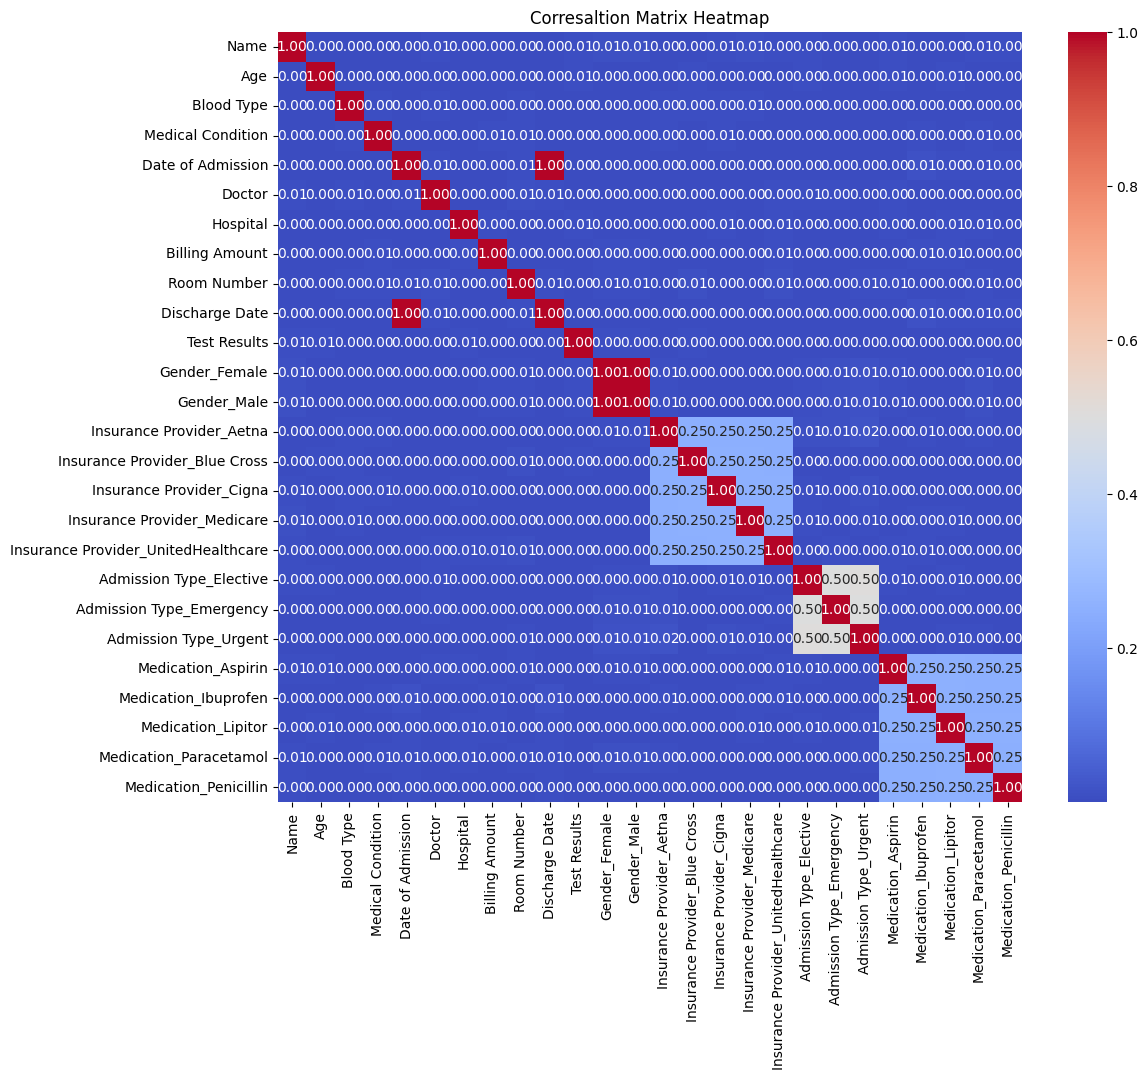

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Corresaltion Matrix Heatmap")
plt.show()

In [23]:
!pip install plotly

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 646.4 kB/s eta 0:00:15
   --- ------------------------------------ 0.8/9.8 MB 834.4 kB/s eta 0:00:11
   --- ------------------------------------ 0.8/9.8 MB 834.4 kB/s eta 0:00:11
   ---- ----------------------------------- 1.0/9.8 MB 772.7 kB/s eta 0:00:12
   ----- ---------------------------------- 1.3/9.8 MB 851.4 kB/s eta 0:00:11
   ----- ---------------------------------- 1.3/9.8 MB 851.4 kB/s eta 0:00:11
   ------ --------------------------------- 1.6/9.8 MB 799.7 kB/s eta 0:00:11
   ------- -------------------------------- 1.8/9.8 MB 852.7 kB/s eta 0:00:10
   -------- -------------------


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import plotly.express as px
import plotly.io as pio
import pandas as pd

# Brauzerda ochish uchun (agar Jupyter ishlatilmasa)
pio.renderers.default = "browser"

# Foydalanuvchi o‘zining `corr_matrix` ni quyidagicha o‘zi hosil qilgan deb faraz qilamiz:
# df = pd.read_csv("your_data.csv")
# corr_matrix = df.corr(numeric_only=True)

# YOKI hozircha kichik test uchun dummy matritsa:
import numpy as np
np.random.seed(0)
data = pd.DataFrame(np.random.rand(5, 5), columns=['A', 'B', 'C', 'D', 'E'])
corr_matrix = data.corr()

# Interaktiv heatmap
fig = px.imshow(
    corr_matrix,
    text_auto='.2f',                   # kataklardagi qiymatlarni ko‘rsatish (2 xonali kasr bilan)
    aspect="auto",                     # avtomatik katak o‘lchami
    color_continuous_scale='RdBu_r',   # rang shkalasi: qizil=salbiy, ko‘k=musbat
    zmin=-1, zmax=1,                   # rang diapazoni (-1 dan 1 gacha)
    title="Correlation Matrix Heatmap (Interactive)"
)

# Grafik ko‘rinishini sozlash
fig.update_layout(
    width=900,
    height=800,
    xaxis_title="Features",
    yaxis_title="Features"
)

# Grafikni ko‘rsatish
fig.show()


# # Filtering >>> Low Impact 

In [28]:
from sklearn.feature_selection import VarianceThreshold
threshold = 0.10
selector = VarianceThreshold(threshold=threshold)
selector.fit(df_filtered)
low_varience_features = df_filtered.columns[~selector.get_support()]
df_low_varience_filtered = df_filtered.drop(columns=low_varience_features)
print("\nOriginal shape:", df_filtered.shape)  
print("Shape after dropping low-variance features:", df_low_varience_filtered.shape)


Original shape: (55500, 24)
Shape after dropping low-variance features: (55500, 17)


In [30]:
# Faqat sonli ustunlarni tanlab olamiz
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Har bir sonli ustun uchun variansani hisoblaymiz
variances = df[numeric_cols].var()

# Past variansa uchun threshold belgilaymiz (masalan: 0.01)
threshold = 0.01

# Threshold’dan kichik bo‘lgan variansali ustunlarni topamiz
low_variance_features = variances[variances < threshold].index.tolist()

# Natijani DataFrame ko‘rinishida saqlaymiz
# Feature -> ustun nomi
# Variance -> ustunning varians qiymati
# LowVariance -> agar ustun past variansli bo‘lsa 'Yes', aks holda 'No'
var_df = pd.DataFrame({
    'Feature': variances.index,
    'Variance': variances.values,
    'LowVariance': ['Yes' if f in low_variance_features else 'No' for f in variances.index]
})

# Plotly Express yordamida bar chart (ustunli grafik) chizamiz
fig = px.bar(
    var_df,
    x='Feature',        # x o‘qi – ustun nomlari
    y='Variance',       # y o‘qi – varians qiymati
    color='LowVariance',  # rang past variansli yoki yo‘qligiga qarab belgilanadi
    color_discrete_map={'Yes': 'red', 'No': 'blue'},  # Yes -> qizil, No -> ko‘k
    text='Variance',    # ustun ustiga varians qiymatini yozib qo‘yish
    title='Feature Variance (Low-Variance Highlighted in Red)'  # grafik sarlavhasi
)

# Grafikni sozlash: x o‘qi yozuvlarini 45° buramiz, grafik o‘lchamini belgilaymiz
fig.update_layout(
    xaxis_tickangle=-45,
    width=1000,
    height=600
)

# Grafikni ko‘rsatish
fig.show()

In [31]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 55500 non-null  float64
 1   Age                                  55500 non-null  float64
 2   Blood Type                           55500 non-null  float64
 3   Medical Condition                    55500 non-null  float64
 4   Date of Admission                    55500 non-null  float64
 5   Doctor                               55500 non-null  float64
 6   Hospital                             55500 non-null  float64
 7   Billing Amount                       55500 non-null  float64
 8   Room Number                          55500 non-null  float64
 9   Test Results                         55500 non-null  float64
 10  Gender_Female                        55500 non-null  float64
 11  Insurance Provider_Aetna    

In [32]:
df_low_varience_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Blood Type                           55500 non-null  float64
 1   Medical Condition                    55500 non-null  float64
 2   Test Results                         55500 non-null  float64
 3   Gender_Female                        55500 non-null  float64
 4   Insurance Provider_Aetna             55500 non-null  float64
 5   Insurance Provider_Blue Cross        55500 non-null  float64
 6   Insurance Provider_Cigna             55500 non-null  float64
 7   Insurance Provider_Medicare          55500 non-null  float64
 8   Insurance Provider_UnitedHealthcare  55500 non-null  float64
 9   Admission Type_Elective              55500 non-null  float64
 10  Admission Type_Emergency             55500 non-null  float64
 11  Admission Type_Urgent       

# WRAPPER 

# EMBEDDED 